In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Stroke Prediction Dataset
- Stroke is the **2nd leading cause of death globally** (≈11% of total deaths) - **WHO**.  
- This dataset predicts if a patient is **likely to have a stroke** based on **age, gender, diseases, and lifestyle factors**.

#### Key Attributes
- **Age & Gender**: Basic demographics  
- **Hypertension & Heart Disease**: 0 = No, 1 = Yes  
- **Ever Married**: Yes / No  
- **Work Type**: Govt, Private, Self-employed, Children, Never worked  
- **Residence**: Rural / Urban  
- **Avg Glucose Level & BMI**: Health indicators  
- **Smoking Status**: formerly smoked / never smoked / smokes / unknown  
- **Stroke**: Target variable (0 = No, 1 = Yes)


*Note: "Unknown" in smoking status means data unavailable.*


In [2]:
df = pd.read_csv("synthetic_stroke_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,80.3,0,0,Yes,Govt_job,Urban,170.38,18.4,Unknown,0
1,2,Female,89.4,0,0,Yes,Self-employed,Urban,186.89,19.6,formerly smoked,0
2,3,Male,87.5,0,0,Yes,Children,Urban,118.42,34.7,never smoked,0
3,4,Male,19.7,0,0,Yes,Private,Urban,226.01,27.1,smokes,0
4,5,Male,85.2,0,0,Yes,Children,Rural,229.64,27.6,Unknown,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   gender             50000 non-null  object 
 2   age                50000 non-null  float64
 3   hypertension       50000 non-null  int64  
 4   heart_disease      50000 non-null  int64  
 5   ever_married       50000 non-null  object 
 6   work_type          50000 non-null  object 
 7   Residence_type     50000 non-null  object 
 8   avg_glucose_level  50000 non-null  float64
 9   bmi                47500 non-null  float64
 10  smoking_status     50000 non-null  object 
 11  stroke             50000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.6+ MB


### handling missing values

In [4]:
df.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  2500
smoking_status          0
stroke                  0
dtype: int64

In [5]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_feature = ['age', 'bmi', 'avg_glucose_level']

scaler = StandardScaler()
bmi_scaled = scaler.fit_transform(df[numerical_feature])

imputer = KNNImputer(n_neighbors=5)
bmi_imputed = imputer.fit_transform(bmi_scaled)

bmi_original_scale = scaler.inverse_transform(bmi_imputed)

df['bmi'] = bmi_original_scale


### handling duplicate rows

In [6]:
df.duplicated().sum()

np.int64(0)

### Outlier Detection

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,54.021022,0.151220,0.102660,159.964413,54.021022,0.048540
std,14433.901067,20.809341,0.358267,0.303517,51.890421,20.809341,0.214906
min,1.000000,18.000000,0.000000,0.000000,70.010000,18.000000,0.000000
25%,12500.750000,36.100000,0.000000,0.000000,114.715000,36.100000,0.000000
50%,25000.500000,54.000000,0.000000,0.000000,160.100000,54.000000,0.000000
75%,37500.250000,72.100000,0.000000,0.000000,205.035000,72.100000,0.000000
max,50000.000000,90.000000,1.000000,1.000000,250.000000,90.000000,1.000000


In [8]:
def detect_outliers_iqr(df, cols):
    outliers_info = {}
    n = len(df)
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        mask = (df[col] < lower) | (df[col] > upper)
        count = mask.sum()
        percent = (count / n) * 100

        outliers_info[col] = {
            'count': count,
            'percentage': round(percent, 2),
        }
    return outliers_info

In [9]:
columns_to_check = ['age', 'bmi', 'avg_glucose_level']

outliers_summary = detect_outliers_iqr(df, columns_to_check)

for col, info in outliers_summary.items():
    print(f"{col}: Count = {info['count']}, Percentage = {info['percentage']}%")


age: Count = 0, Percentage = 0.0%
bmi: Count = 0, Percentage = 0.0%
avg_glucose_level: Count = 0, Percentage = 0.0%


### Exploratory Data Analysis

` Attribute Classification: `
**A. Numerical Attribute:**  
- age (Continuous)
- bmi  
- avg_glucose_level

**B. Categorical Attribute:**  
- gender (Nominal)  
- smoking_status  
- work_type
- Residence_type

**C. Binary Attributes (0: No, 1: Yes):**  
- hypertension 
- heart_disease 
- ever_married

**D. Target Variable:**  
- stroke

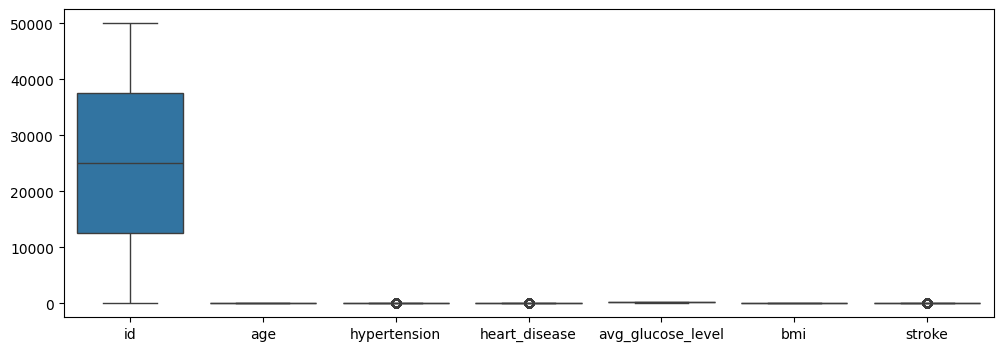

In [10]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df)
plt.show()

#### Distribution of numerical Features

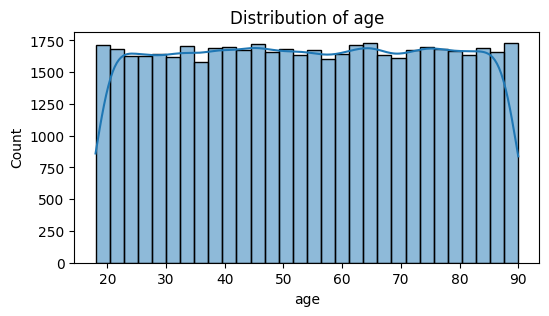

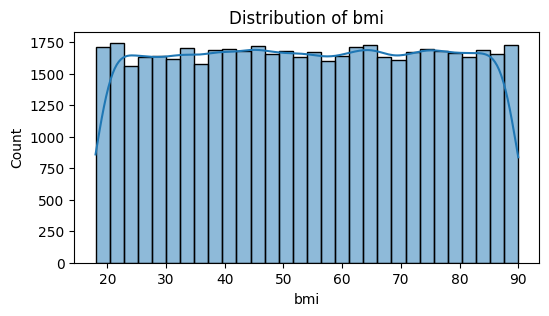

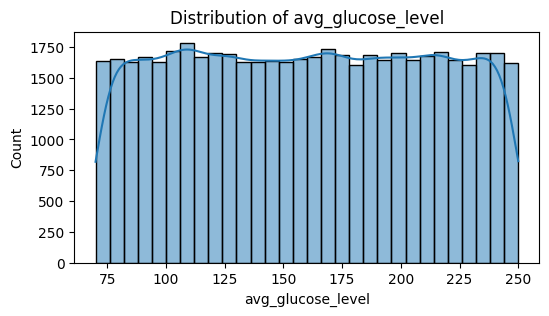

In [11]:
numerical_features = ['age', 'bmi', 'avg_glucose_level']

for col in numerical_features:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Distribution of Numerical ditribution vs Stroke


***Checking which feature/column should be converted into Bins***


In [12]:
for column in df.columns:
    print(f'{column} =>', df[column].value_counts().shape)

id => (50000,)
gender => (2,)
age => (721,)
hypertension => (2,)
heart_disease => (2,)
ever_married => (2,)
work_type => (4,)
Residence_type => (2,)
avg_glucose_level => (16914,)
bmi => (721,)
smoking_status => (4,)
stroke => (2,)


In [13]:
bins_age = [18, 25, 35, 45, 55,float('inf')]
labels_age = ['18-25', '26-35', '36-45', '46-55', '56+']
df['age_bin'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)
print(df['age_bin'].value_counts())

age_bin
56+      24242
46-55     7026
36-45     6907
26-35     6857
18-25     4930
Name: count, dtype: int64


In [14]:
bins_glucose = [0, 100, 140, 200, 500] 
labels_glucose = ['Low', 'Normal', 'High', 'Very High']
df['glucose_bin'] = pd.cut(df['avg_glucose_level'], bins=bins_glucose, labels=labels_glucose)
print(df['glucose_bin'].value_counts())

glucose_bin
High         16646
Very High    13856
Normal       11279
Low           8219
Name: count, dtype: int64


In [15]:
bins_bmi = [0, 18.5, 24.9, 29.9, 100]  # underweight, normal, overweight, obese
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_bin'] = pd.cut(df['bmi'], bins=bins_bmi, labels=labels_bmi)
print(df['bmi_bin'].value_counts())

bmi_bin
Obese          41702
Normal          4487
Overweight      3406
Underweight      405
Name: count, dtype: int64


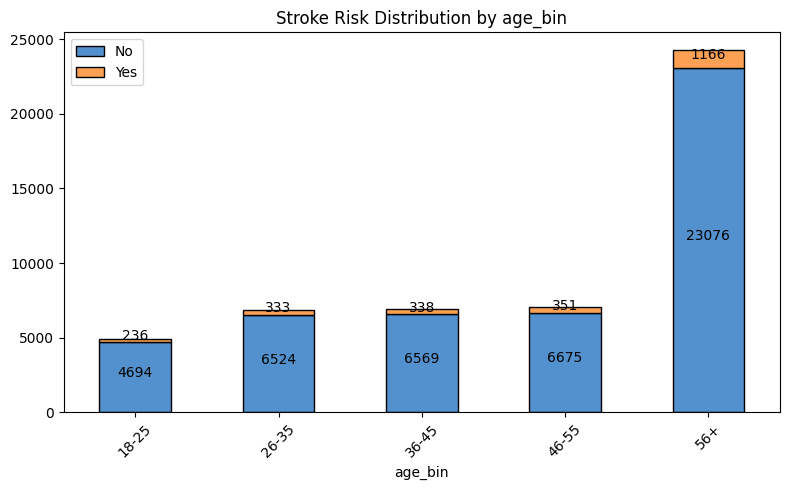

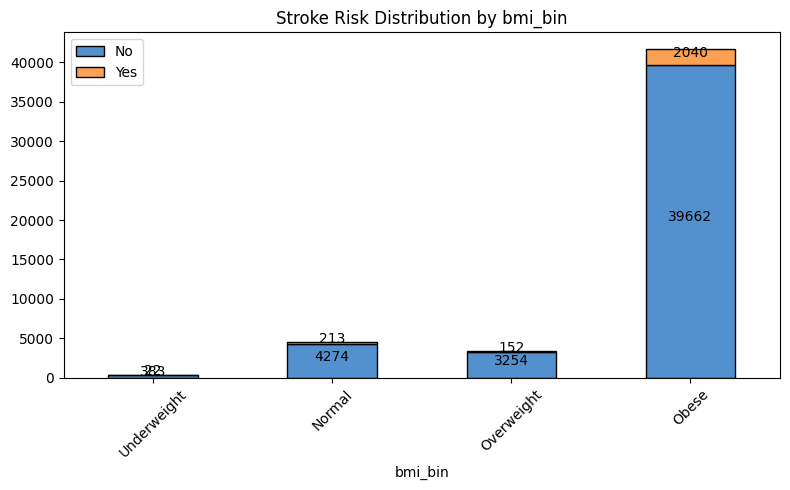

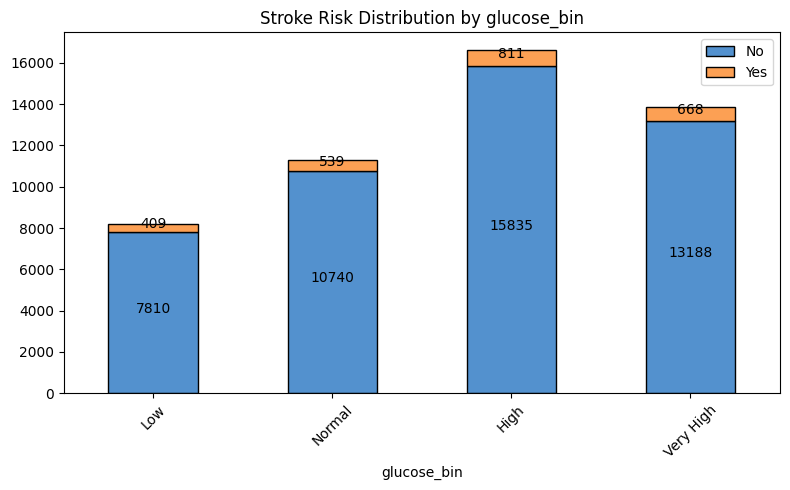

In [16]:
features_to_plot = ['age_bin', 'bmi_bin', 'glucose_bin']

colors = ["#5391ce", "#fca054"]
labels = ['No', 'Yes']

for feature in features_to_plot:
    risk_counts = df.groupby([feature, 'stroke']).size().unstack(fill_value=0)
    ax = risk_counts.plot(kind='bar', stacked=True, color=colors, edgecolor='black', figsize=(8, 5))
    for i, (no_risk, risk) in enumerate(risk_counts.values):
        ax.text(i, no_risk / 2, str(no_risk), ha='center', fontsize=10)
        ax.text(i, no_risk + risk / 2, str(risk), ha='center', fontsize=10)
    
    ax.set_xlabel(feature)
    ax.set_title(f'Stroke Risk Distribution by {feature}')
    ax.legend(labels)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [17]:
df.drop(features_to_plot, axis=1, inplace=True)

#### Distribution of binary Features

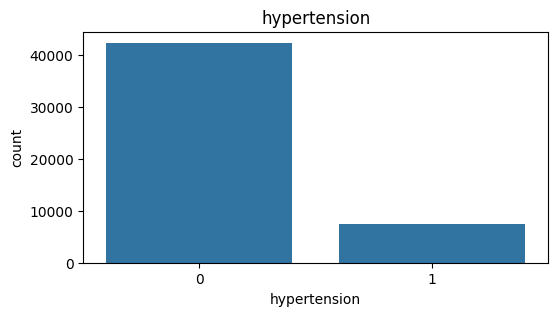

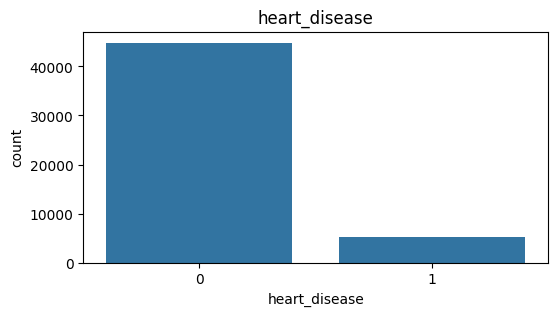

In [18]:
binary_features = ['hypertension', 'heart_disease']

for col in binary_features:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df)
    plt.title(f'{col}')
    plt.show()

#### Distribution of Categorical Features vs Stroke

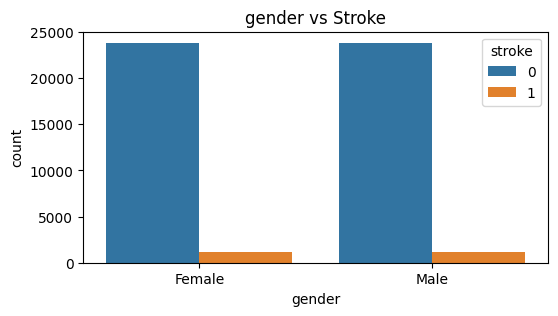

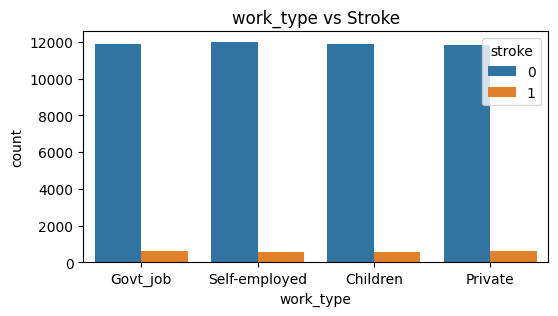

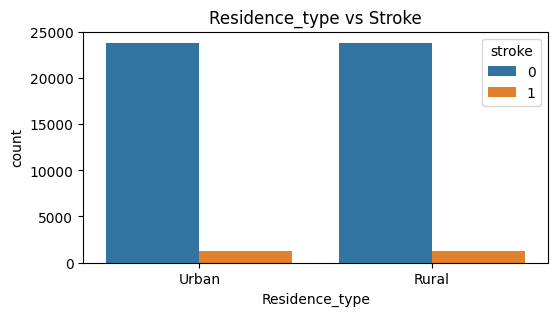

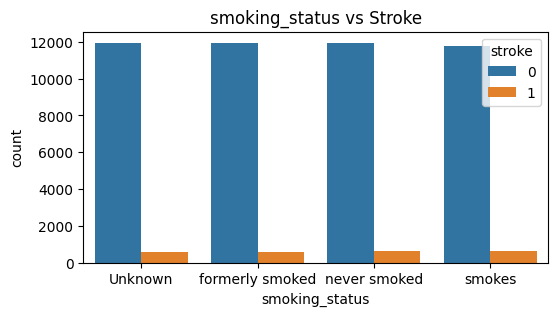

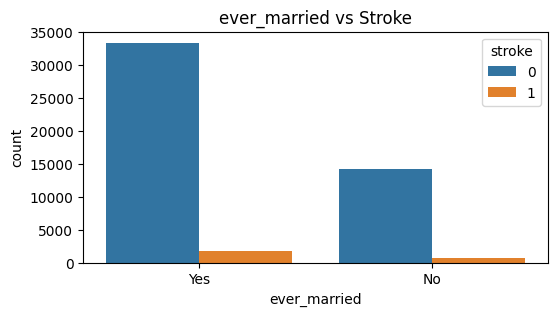

In [19]:
categorical_features = ['gender', 'work_type', 'Residence_type','smoking_status','ever_married']

for col in categorical_features:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f'{col} vs Stroke')
    plt.show()

#### Distribution of Target

`Checking Balanced or Imbalanced Dataset`

In [20]:
df['stroke'].value_counts()

stroke
0    47573
1     2427
Name: count, dtype: int64

Text(0.5, 1.02, 'Count of TARGET per category')

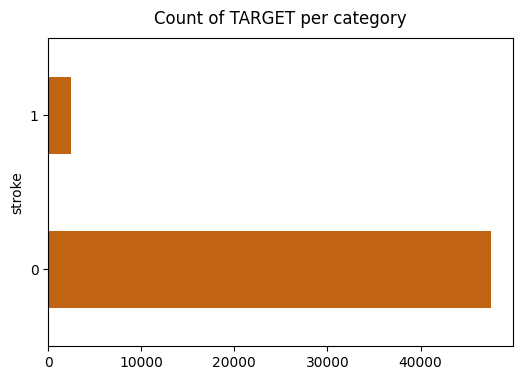

In [21]:
df['stroke'].value_counts().plot(kind='barh', color="#C06414", figsize=(6, 4))
plt.title("Count of TARGET per category", y=1.02)


### Encoding

***binary columns***

In [22]:
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df['Residence_type'] = df['Residence_type'].map({ 'Rural': 0,'Urban': 1})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

***Nominal Columns***

In [23]:
df = pd.get_dummies(
    df,
    columns=['work_type', 'smoking_status'],
    drop_first=True
)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              50000 non-null  int64  
 1   gender                          50000 non-null  int64  
 2   age                             50000 non-null  float64
 3   hypertension                    50000 non-null  int64  
 4   heart_disease                   50000 non-null  int64  
 5   ever_married                    50000 non-null  int64  
 6   Residence_type                  50000 non-null  int64  
 7   avg_glucose_level               50000 non-null  float64
 8   bmi                             50000 non-null  float64
 9   stroke                          50000 non-null  int64  
 10  work_type_Govt_job              50000 non-null  bool   
 11  work_type_Private               50000 non-null  bool   
 12  work_type_Self-employed         

***Converting Boolean Columns to Integer***

In [25]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1,80.3,0,0,1,1,170.38,80.3,0,1,0,0,0,0,0
1,2,1,89.4,0,0,1,1,186.89,89.4,0,0,0,1,1,0,0
2,3,0,87.5,0,0,1,1,118.42,87.5,0,0,0,0,0,1,0
3,4,0,19.7,0,0,1,1,226.01,19.7,0,0,1,0,0,0,1
4,5,0,85.2,0,0,1,0,229.64,85.2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1,64.3,0,0,0,0,118.92,64.3,0,1,0,0,0,1,0
49996,49997,1,72.1,0,0,1,1,120.36,72.1,0,0,0,0,0,0,0
49997,49998,1,80.5,0,0,1,0,82.62,80.5,0,0,0,0,0,0,0
49998,49999,1,29.2,0,0,1,1,86.16,29.2,0,0,0,0,1,0,0


***The `id` column is a unique identifier and does not affect analysis, so it has been removed.***

In [26]:
df.drop("id", axis=1, inplace=True)

### Saving the DataFrame to CSV

In [27]:
output_filename = 'stroke_updated.csv'
df.to_csv(output_filename, index=False)